# データの取得

In [1]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from pathlib import Path
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [2]:
# サンプルデータセットの読み込み
data = load_breast_cancer()

In [3]:
# pandas Dataframe形式で説明変数Xを取得
df_X = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
# pandas Series形式で目的変数yを取得
s_y = pd.Series(data.target)

In [5]:
# pandas Dataframe形式で目的変数と説明変数を結合したXyを取得
df_Xy = pd.concat([df_X, s_y], axis=1, join='inner')

In [6]:
# colum最終列にある目的変数に名前がついていないので"target'という名前に変更
df_Xy = df_Xy.rename(columns={0:"target"})

# 特徴量重要度の可視化用関数

In [7]:
# 特徴量重要度を棒グラフでプロットする関数 
def plot_feature_importance(df): 
    n_features = len(df)                              # 特徴量数(説明変数の個数) 
    df_plot = df.sort_values('importance')            # df_importanceをプロット用に特徴量重要度を昇順ソート 
    f_importance_plot = df_plot['importance'].values  # 特徴量重要度の取得 
    plt.barh(range(n_features), f_importance_plot, align='center') 
    cols_plot = df_plot['feature'].values             # 特徴量の取得 
    plt.yticks(np.arange(n_features), cols_plot)      # x軸,y軸の値の設定
    plt.xlabel('Feature importance')                  # x軸のタイトル
    plt.ylabel('Feature')                             # y軸のタイトル

# データ分割

In [8]:
# 全体の20%をテストデータとして分割
X_train, X_test, y_train, y_test = train_test_split(df_X, s_y,test_size=0.20, random_state=2)

# モデルの学習

In [9]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train) 

# LightGBM parameters
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'binary',        # 目的 : 2クラス分類  
        'metric': {'binary_error'},   # 評価指標 : 誤り率(= 1-正答率) 
}

# モデルの学習
model = lgb.train(params,
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  )

[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 288, number of negative: 167
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.632967 -> initscore=0.544967
[LightGBM] [Info] Start training from score 0.544967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_error: 0.394737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_error: 0.394737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_error: 0.0701754
[LightGBM] [Wa

# 特徴量重要度の算出

In [10]:
# 特徴量重要度の算出 (データフレームで取得)
cols = list(df_X.columns)     # 特徴量名のリスト(目的変数target以外)
# 特徴量重要度の算出方法 'gain'(推奨) : トレーニングデータの損失の減少量を評価
f_importance = np.array(model.feature_importance(importance_type='gain')) # 特徴量重要度の算出 //
f_importance = f_importance / np.sum(f_importance) # 正規化(必要ない場合はコメントアウト)
df_importance = pd.DataFrame({'feature':cols, 'importance':f_importance})
df_importance = df_importance.sort_values('importance', ascending=False) # 降順ソート
display(df_importance)

,feature,importance
22,worst perimeter,0.479354
23,worst area,0.149128
7,mean concave points,0.107655
27,worst concave points,0.086977
21,worst texture,0.060623
20,worst radius,0.037806
13,area error,0.016713
24,worst smoothness,0.014493
1,mean texture,0.011774
26,worst concavity,0.011765


# 特徴量重要度の可視化

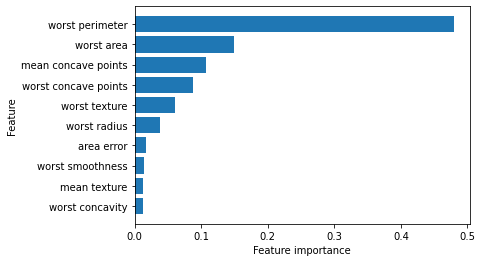

In [11]:
# 特徴量重要度の可視化
n_display = 10 # 上位10個に制限
plot_feature_importance(df_importance.iloc[:n_display,:])